# KMeans clustering

In [1]:
#importing required basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
df = pd.read_csv(r'C:\Users\Sreeraj\Documents\College_Data.csv', index_col=0)

In [25]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

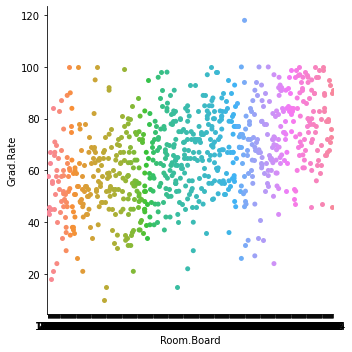

In [6]:
sns.catplot(data=df, x='Room.Board', y='Grad.Rate')

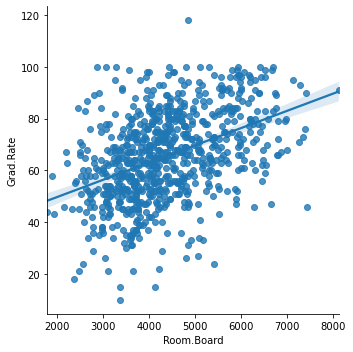

In [9]:
sns.lmplot(data=df, x='Room.Board', y='Grad.Rate')

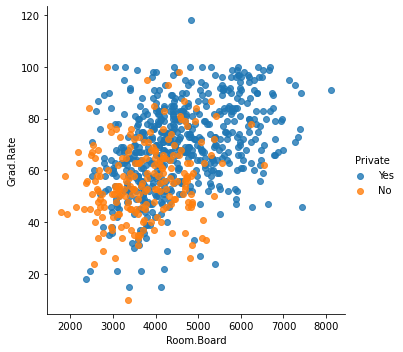

In [11]:
sns.lmplot(data=df, x='Room.Board', y='Grad.Rate', hue='Private', fit_reg=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


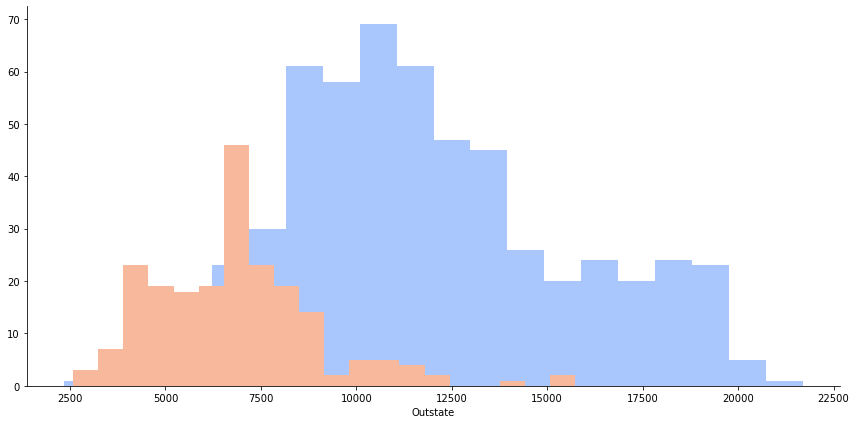

In [13]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20)

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

In [27]:
df['p'] = km.predict(df.iloc[:,1:])

In [15]:
#creating a new column 'cluster'  : 1 for private & 0 for public

In [28]:
def converter(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0

In [31]:
df['Cluster'] = df['Private'].apply(converter)

In [32]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,p,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df['p'], df['Cluster']))

print('------------------------')
print(classification_report(df['p'], df['Cluster']))

[[138 531]
 [ 74  34]]
------------------------
              precision    recall  f1-score   support

           0       0.65      0.21      0.31       669
           1       0.06      0.31      0.10       108

    accuracy                           0.22       777
   macro avg       0.36      0.26      0.21       777
weighted avg       0.57      0.22      0.28       777



In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(df[['p']], df[['Cluster']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4336977526154969